Problem Statement


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.


In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do
Exploratory Data Analysis

Understanding what type content is available in different countries

Is Netflix has increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA


##common libraries of python to be imported to check the data and build view graphs and insights

In [270]:
df = pd.read_csv("/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df

##to check the dataset given to us

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devast

In [271]:
# Check for duplicated entries.
df.duplicated().sum()

np.int64(0)

In [272]:
df.shape

(7787, 12)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [274]:
##this function allows us to define the required summary attributes from the dataset we required
def summary(df):
    summry = pd.DataFrame(df.dtypes, columns=['Data type'])
    summry['#Missing'] = df.isnull().sum().values
    summry['#Duplicate'] = df.duplicated().sum()
    summry['#Unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summry['Min'] = desc['min'].values
    summry['Max'] = desc['max'].values
    summry['Avg'] = desc['mean'].values
    summry['Std dev'] = desc['std'].values
    summry['Top value'] = desc['top'].values
    summry['Freq'] = desc['freq'].values

    return summry

In [275]:
summary(df).style.set_caption("<b style='font-size:16px;'>DATA SUMMARY</b>").\
background_gradient(cmap='Blues', axis=0). \
set_properties(**{'border': '1.3px dotted', 'color': '', 'caption-side': 'left'})

In [276]:
#Variables in the dataset
print(f'Variables in the dataset : {list(df.columns)}')

Variables in the dataset : ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [277]:
# finding null values and unique value counts
null_values= round(df.isnull().sum() * 100 / len(df),2)
unique_values=df.nunique()
analysis_df = pd.DataFrame({'column_name': df.columns,"unique_values": unique_values,'null_values_%': null_values,"data_type":df.dtypes})
analysis_df.reset_index(drop=True,inplace=True)
analysis_df


column_name  unique_values  null_values_% data_type
0        show_id           7787           0.00    object
1           type              2           0.00    object
2          title           7787           0.00    object
3       director           4049          30.68    object
4           cast           6831           9.22    object
5        country            681           6.51    object
6     date_added           1565           0.13    object
7   release_year             73           0.00     int64
8         rating             14           0.09    object
9       duration            216           0.00    object
10     listed_in            492           0.00    object
11   description           7769           0.00    object

In [278]:
!pip install yellowbrick

In [279]:
!pip install kaleido

In [280]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [281]:

# Number of null values in date_added.
df.date_added.isnull().sum()

np.int64(10)

In [282]:
# Remove null values in date_added.
df.dropna(subset=['date_added'], inplace=True)

In [283]:
# Number of null values in rating.
df.rating.isnull().sum()

np.int64(7)

In [284]:
# Remove null values in rating.
df.dropna(subset=['rating'], inplace=True)

In [285]:
# Remove leading/trailing spaces from date strings
df['date_added'] = df['date_added'].str.strip()

# Convert to datetime (mixed formats allowed)
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Create new date-related features
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


##EDA(EXPLORATORY DATA ANALYSIS)

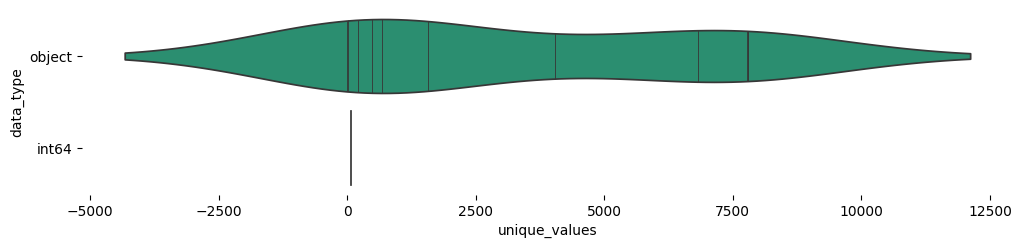

In [286]:
##title data_type vs unique_values


figsize = (12, 1.2 * len(analysis_df['data_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(analysis_df, x='unique_values', y='data_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

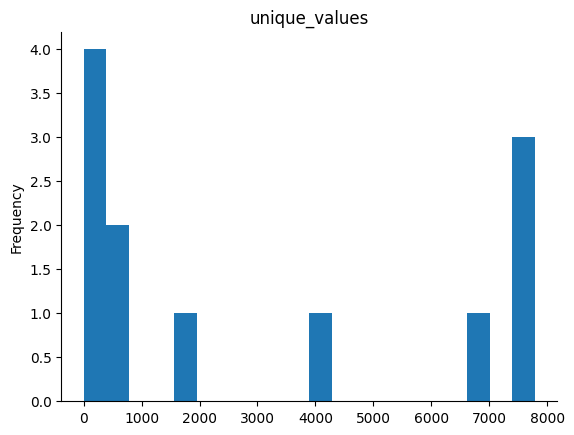

In [287]:
##title unique_values

analysis_df['unique_values'].plot(kind='hist', bins=20, title='unique_values')
plt.gca().spines[['top', 'right',]].set_visible(False)

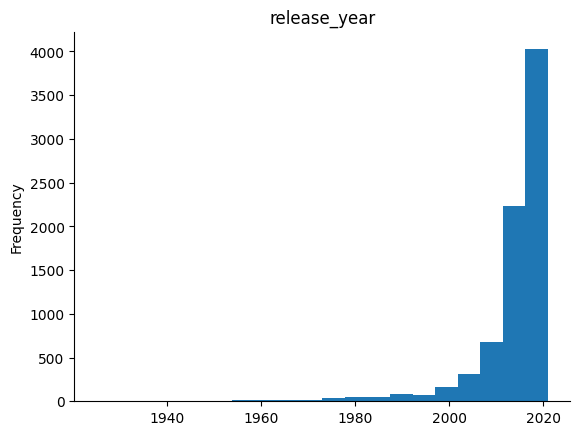

In [288]:
##title release_year
##this graph helps in understanding the number of contents added constantly in netflix every year in the graph

df['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

#we can clearly see the increase of number of titles added to netflix is got increased based upon the years passsing from the initial stages

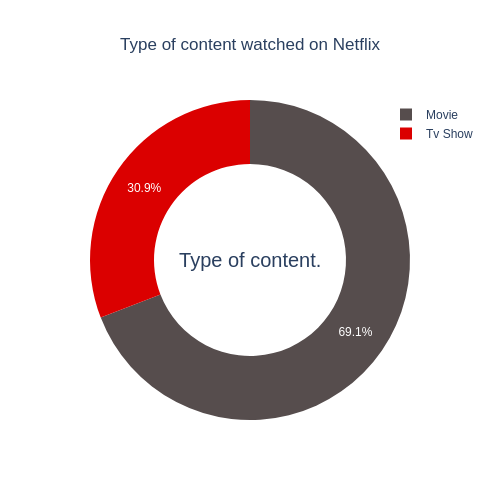

In [289]:

# Create a pie chart for Type.
colors = ['	#db0000', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = df.type.value_counts()[1]
movie = df.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content watched on Netflix",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])
fig.update_traces(marker=dict(colors=colors))

fig.show('png')

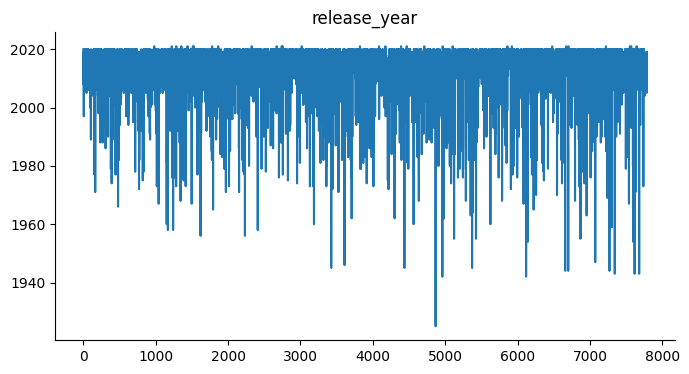

In [290]:
##title release_year
##this gives info about the number of different shows are added based upon the title for every year of the netflix

df['release_year'].plot(kind='line', figsize=(8, 4), title='release_year')
plt.gca().spines[['top', 'right']].set_visible(False)

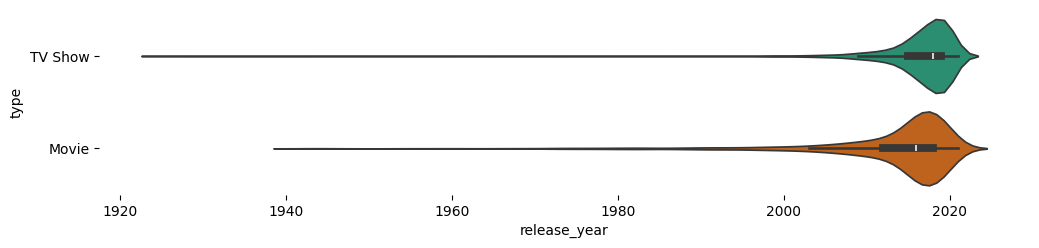

In [291]:
# @title type vs release_year


figsize = (12, 1.2 * len(df['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='release_year', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
##this helps in understanding how the content increase is done inthe dataset

In [346]:

import plotly.graph_objs as go

# Ensure date_added is in datetime format and strip whitespace
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Filter TV Shows and Movies
tv_show = df[df['type'] == 'TV Show']
movie = df[df['type'] == 'Movie']

# Define the column to analyze
col = 'year_added'

# Count year-wise TV Shows
content_1 = tv_show[col].value_counts().reset_index()
content_1.columns = [col, 'count']
content_1 = content_1.sort_values(col)

# Count year-wise Movies
content_2 = movie[col].value_counts().reset_index()
content_2.columns = [col, 'count']
content_2 = content_2.sort_values(col)

# Create traces
trace1 = go.Scatter(
    x=content_1[col], y=content_1['count'],
    name="TV Shows", marker=dict(color="#db0000")
)
trace2 = go.Scatter(
    x=content_2[col], y=content_2['count'],
    name="Movies", marker=dict(color="#564d4d")
)

# Layout setup
layout = go.Layout(
    title="Content Added Over the Years",
    title_x=0.47,
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Contents'),
    legend=dict(x=0.4, y=1.1, orientation="h")
)

# Combine and plot
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Save and show
fig.write_image("images/content_added_over_year.png", scale=5)
fig.show()


Growth in the number of movies on Netflix is much higher than tv shows.
From 2015 we can see a noticeable addition in the number of movies and tv shows uploaded by Netflix on its platform.
The highest number of movies and tv shows got added in 2019 and 2020.
The line plot shows very few movies, and tv shows got added in 2021. It is due to very little data collected from the year 2021.

In [293]:

# Create dataframe to store manth values and counts.
months_df = pd.DataFrame(df.month_added.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'month_added':'count'}, inplace=True)

In [294]:
# Example: Creating months_df properly
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['month_added'] = df['date_added'].dt.month_name()

# Group by month name
months_df = df['month_added'].value_counts().reset_index()
months_df.columns = ['month', 'count']

# Optional: Sort months in calendar order
from calendar import month_name
month_order = list(month_name)[1:]  # Skip empty string at index 0
months_df['month'] = pd.Categorical(months_df['month'], categories=month_order, ordered=True)
months_df = months_df.sort_values('month')

# Plot
import plotly.express as px

fig = px.bar(
    months_df,
    x="month",
    y="count",
    text_auto=True,
    color='count',
    color_continuous_scale=['#db0000', '#564d4d']
)
fig.update_layout(
    title={
        'text': 'Month-wise Addition of Movies and Shows to the Platform',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Month",
    yaxis_title="Number of Contents"
)
fig.show()


In [295]:

# Create dataframe to store day values and count.
days_df = pd.DataFrame(df.day_added.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'day', 'day_added':'count'}, inplace=True)

In [345]:
# Step 1: Extract day of week from 'date_added'
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['day_added'] = df['date_added'].dt.day_name()

# Step 2: Group by day of the week
days_df = df['day_added'].value_counts().reset_index()
days_df.columns = ['day', 'count']

# Optional: Sort days in order (Monday to Sunday)
from calendar import day_name
day_order = list(day_name)
days_df['day'] = pd.Categorical(days_df['day'], categories=day_order, ordered=True)
days_df = days_df.sort_values('day')

# Step 3: Plot
import plotly.express as px

fig = px.bar(
    days_df,
    x="day",
    y="count",
    text_auto=True,
    color='count',
    color_continuous_scale=['#db0000', '#564d4d']
)
fig.update_layout(
    title={
        'text': 'Which Days Are More Prominent',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    autosize=False,
    width=1200,
    height=600
)

fig.show()


In [297]:

# Create a dict to store counts of each country appearing in our dataset.
countries = ", ".join(df['country'].dropna()).split(", ")
countries_dict = dict(Counter(countries))
countries_dict = dict((key.lower(), value) for key, value in countries_dict.items())

In [298]:
# Map the country code dataset with countries dict.
df['Count'] = df['country'].map(countries_dict)

In [299]:
!pip install pycountry


In [300]:
import pycountry

def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

df['Code'] = df['country'].apply(get_country_code)


In [344]:
# Install required library
!pip install pycountry --quiet

import pycountry
import plotly.graph_objects as go
import pandas as pd

# Sample data (you should replace this with your actual df)
# df = pd.DataFrame({'Country': ['United States', 'India', 'United Kingdom', 'Brazil'], 'Count': [120, 85, 60, 40]})

# Ensure country code (ISO-3) is generated correctly
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

# Create ISO codes only if not already present
df['Code'] = df['country'].apply(get_country_code)

# Drop rows with missing or invalid ISO codes or zero count
choropleth_df = df.dropna(subset=['Code', 'Count'])

# Check if z-values are valid
choropleth_df['Count'] = pd.to_numeric(choropleth_df['Count'], errors='coerce')
choropleth_df = choropleth_df.dropna(subset=['Count'])

# Plotly choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=choropleth_df['Code'],  # ISO 3-letter codes
    z=choropleth_df['Count'],         # Data to be color-coded
    text=choropleth_df['country'],    # Hover text
    colorscale='Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Content Count',
))

# Layout for map
fig.update_layout(
    title_text='Country-wise Content Production',
    title_x=0.5,

    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    )
)

fig.show()


In [343]:
# Lets find the top ten countries that produce most of the content.
top_ten = Counter(countries_dict).most_common(10)

country = [_[0] for _ in top_ten][::-1]
count = [_[1] for _ in top_ten][::-1]
trace1 = go.Bar(y=country, x=count, orientation="h", name="", marker=dict(color='#db0000'))

data = [trace1]
layout = go.Layout(title="Countries with most content", title_x = 0.5, height=500, width=1200, legend=dict(x=0.5, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
# fig.show()
fig.show()


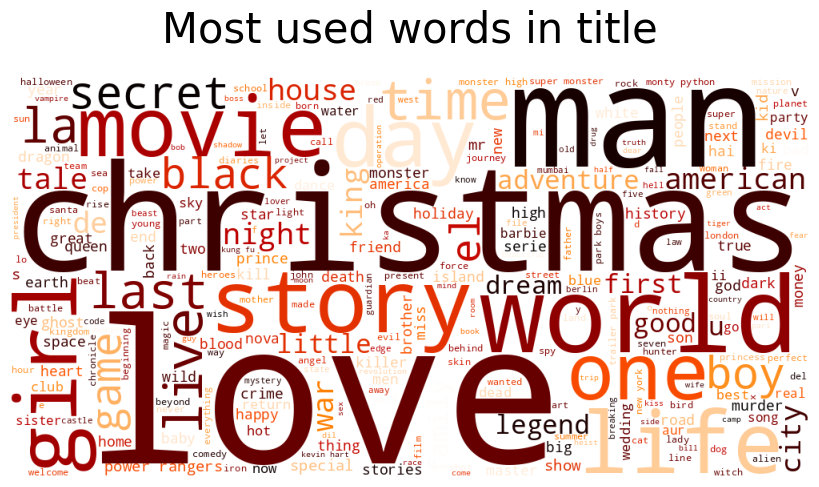

In [303]:
# Import the required libraries.
from wordcloud import WordCloud, STOPWORDS

# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)

# iterate through the column.
for val in df.title:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


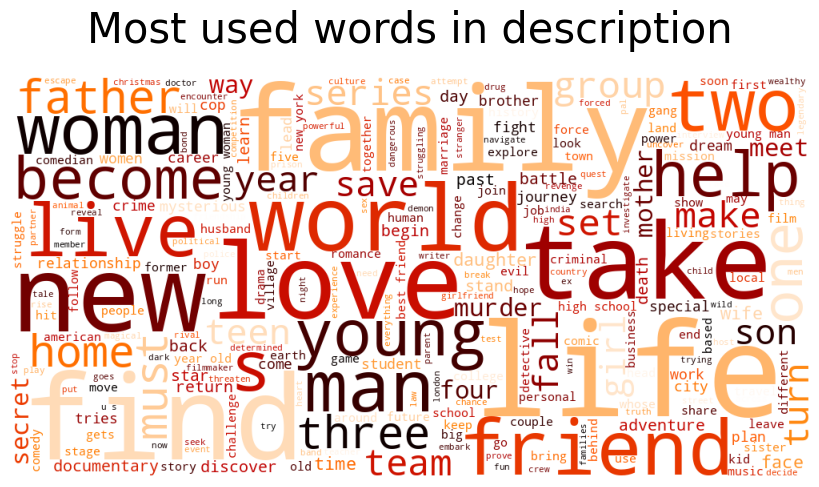

In [304]:
# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)

# iterate through the column.
for val in df.description:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat').generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()



In [305]:
df.head(2)

show_id     type title           director  \
0      s1  TV Show    3%                NaN   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description day_added  year_added  \
0  In a future where the elite inhabit an island ...    Friday        2020   
1  After a devastating earthquake hits Mexico Cit...    Friday        2016   

  month_added  Count Code  
0      August    NaN  BRA  
1    December    NaN  MEX

In [306]:

# Replace the null values in director.
df['director']=df['director'].fillna('')

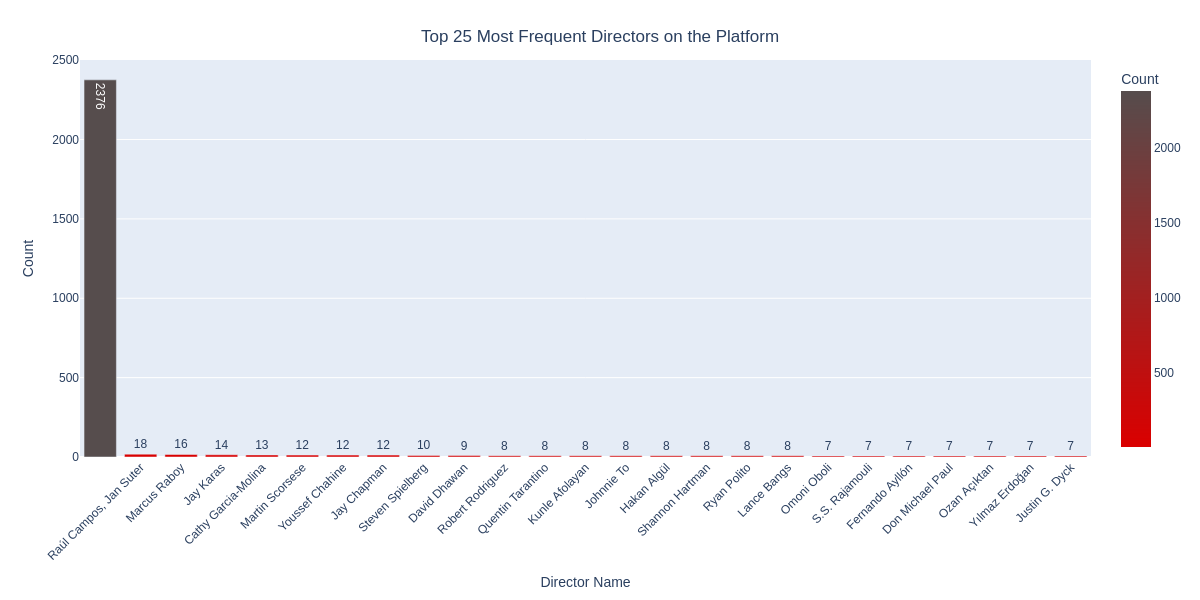

In [307]:
# Step 1: Remove nulls and get top 25 directors
directors_list = df['director'].dropna().value_counts().reset_index().head(25)
directors_list.columns = ['Director Name', 'Count']  # Set correct column names

# Step 2: Create bar chart
fig = px.bar(
    directors_list,
    x='Director Name',
    y='Count',
    text_auto=True,
    color='Count',
    color_continuous_scale=['#db0000', '#564d4d']
)

# Step 3: Update layout and display
fig.update_layout(
    title={
        'text': 'Top 25 Most Frequent Directors on the Platform',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_tickangle=-45,
    autosize=False,
    width=1200,
    height=600
)

fig.show('png')


In [342]:
fig = px.bar(
    directors_list,
    y='Director Name',  # swapped axes
    x='Count',
    text_auto=True,
    orientation='h',  # horizontal bars
    color='Count',
    color_continuous_scale=['#db0000', '#564d4d']
)

fig.update_layout(
    title={
        'text': 'Top 25 Most Frequent Directors on the Platform',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    autosize=False,
    width=1200,
    height=800
)

fig.show()


In [309]:
# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(data['cast'])  # define the data we intend to use.
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [311]:
# Create dataframe for list of actors.
actor_list = pd.DataFrame([data2list(df)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(106)  # dropped the nan values in the dataframe which was present at 106th index.


In [312]:
actor_list.head(10)

index   0
1294        Anupam Kher  38
194    Takahiro Sakurai  28
2203            Om Puri  27
4039     Shah Rukh Khan  27
740         Boman Irani  25
2506       Paresh Rawal  24
8462      Andrea Libman  24
4368          Yuki Kaji  23
2201       Akshay Kumar  22
4994       Vincent Tong  22

In [341]:

# Plot it.
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#564d4d', '#db0000'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show()

In [314]:

# Replace the null values in cast.
df['cast']=df['cast'].fillna('')

##country vs content

In [316]:
country_null_values = df.country.isnull().sum()
print(f'We had observed that variable country had {country_null_values} null values in it, we will replace these null values with the most occurring country which is United States.')


We had observed that variable country had 505 null values in it, we will replace these null values with the most occurring country which is United States.


In [318]:
''' Since there are many countries, we will take the top ten countries that produce
     content and see what type of content these countries provide the most?'''

df['country'].fillna('United States', inplace=True)
df['country_single'] = df['country'].apply(lambda x: x.split(",")[0])
country_order = df['country_single'].value_counts()[:10].index
countryVScontent = df[['type', 'country_single']].groupby('country_single')['type'].value_counts().unstack().loc[country_order].reset_index()
countryVScontent

type  country_single   Movie  TV Show
0      United States  2326.0   1053.0
1              India   883.0     73.0
2     United Kingdom   341.0    235.0
3             Canada   175.0     84.0
4              Japan    75.0    160.0
5             France   137.0     59.0
6        South Korea    42.0    152.0
7              Spain   119.0     49.0
8             Mexico    79.0     44.0
9             Turkey    78.0     28.0

In [340]:
# Plot the above data.
fig = go.Figure()
fig.add_trace(go.Bar(
    y=countryVScontent['country_single'],
    x=countryVScontent['Movie'],
    name='Movies',
    orientation='h',
    marker=dict(
        color='rgba(219, 0, 0, 1)'
    )
))
fig.add_trace(go.Bar(
    y=countryVScontent['country_single'],
    x=countryVScontent['TV Show'],
    name='TV Show',
    orientation='h',
    marker=dict(
        color='rgba(86, 77, 77, 1)'
    )
))

fig.update_layout(barmode='stack',
                   title={'text': 'Top ten countries and the content they provide.',
                          'y':0.89,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'}
                  )
# fig.show()
fig.show()

In [322]:
# Create subset of dataset with required data.
conuntryVSgenre = df[['country', 'listed_in']]

# Create a function to seperate all genres and store counts for each.
def country_wise_genre(country):
  country_genre = conuntryVSgenre[conuntryVSgenre['country'] == country]
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict

# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)


In [339]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a separate copy for this chart to avoid modifying the original df
df_genre_by_country = country_genre_count_df.copy()

# List of countries to visualize
countries = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan',
             'France', 'South Korea', 'Spain', 'Mexico', 'Australia']

# Colors for pie charts
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise',
          'darkviolet', 'deeppink', 'forestgreen', 'fuchsia', 'gainsboro', 'goldenrod', 'gray', 'maroon', 'mediumaquamarine',
          'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'plum', 'powderblue',
          'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna',
          'silver', 'slategray', 'snow', 'springgreen', 'tomato', 'yellow', 'yellowgreen']

# Create subplot layout
fig = make_subplots(
    rows=2, cols=5,
    specs=[[{'type': 'domain'}] * 5] * 2,
    subplot_titles=countries
)

# Add pie charts dynamically
for i, country in enumerate(countries):
    if country in df_genre_by_country.columns:
        country_data = df_genre_by_country[['Genre', country]].dropna()
        country_data = country_data[country_data[country] > 0]  # Filter zero values

        if not country_data.empty:
            row, col = divmod(i, 5)
            fig.add_trace(
                go.Pie(
                    labels=country_data['Genre'],
                    values=country_data[country],
                    name=country,
                    marker=dict(colors=colors[:len(country_data)]),
                    hoverinfo='label+percent+name',
                    textinfo='none'
                ),
                row=row + 1, col=col + 1
            )
        else:
            print(f"[Warning] No data for {country}. Skipped.")
    else:
        print(f"[Warning] Column '{country}' not found in DataFrame. Skipped.")

# Layout styling
fig.update_layout(
    title={
        'text': 'Top 10 Countries and the Content They Provide',
        'x': 0.5, 'y': 0.95,
        'xanchor': 'center', 'yanchor': 'top',
        'font': dict(size=24)
    },
    height=750,
    width=1500,
    paper_bgcolor='white',
    legend=dict(x=0.1, y=-0.1, orientation="h")
)

# Display plot
fig.show()


In [327]:
hypo_data = pd.crosstab(df['type'], df['year_added'], margins=False)
hypo_data

year_added  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
type                                                                           
Movie          1     2     1    13     3     6    19    58   256   861  1255   
TV Show        1     0     0     0     0     5     6    30   184   361   429   

year_added  2019  2020  2021  
type                          
Movie       1497  1312    88  
TV Show      656   697    29

In [328]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

p

np.float64(7.478336952750899e-11)

In [329]:

# Now lets check what type of content got added in the past few years.

'''We will only check for the type of genres that got added in the years 2018-2021 for better visualization. '''

# Create subset of data with required columns.
recent_years = pd.DataFrame(df.groupby(['year_added', 'listed_in'])['listed_in'].count())
recent_years.rename(columns={'listed_in':'Count'}, inplace=True)
recent_years = recent_years.reset_index()
recent_years.drop(recent_years[recent_years.year_added < 2018].index, inplace=True)

''' There are many rows with multiple genre entries therefore we will
 create a function to split each of them and get their respective counts.'''

def seperate_all_genre(year):
  year_added = recent_years[recent_years['year_added'] == year]
  year_added = ", ".join(year_added['listed_in'].dropna()).split(", ")
  year_added_dict = dict(Counter(year_added))
  return year_added_dict
# Create a list of years.
yr_list = [2018,2019,2020,2021]
# Iterate through all values in yr_list.
yr_genre_count_list = {}
for i in yr_list:
  data = seperate_all_genre(i)
  yr_genre_count_list[i] = data
  yr_genre_count_df = pd.DataFrame(yr_genre_count_list).reset_index()
  yr_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)


In [338]:
import plotly.graph_objects as go

# Copy and sort data without altering the original DataFrame
df_genre_yearwise = yr_genre_count_df.sort_values(by=[2018, 2019, 2020, 2021], ascending=False)

# Create figure
fig = go.Figure()

# Years to plot
years = [2018, 2019, 2020, 2021]

# Add traces dynamically
for year in years:
    fig.add_trace(go.Scatter(
        x=df_genre_yearwise['Genre'],
        y=df_genre_yearwise[year],
        mode='lines+markers',
        name=str(year)
    ))

# Update layout
fig.update_xaxes(tickangle=-90)

fig.update_layout(
    title={
        'text': 'Most Added Genres in Recent Years',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    height=650,
    width=1550,
    paper_bgcolor='white',
    legend=dict(x=0.4, y=1.1, orientation="h")
)

# Show interactive plot
fig.show()


In [331]:
# Create subsets for TV Shows and Movies
tv_shows = df[df['type'] == 'TV Show'].copy()
movies = df[df['type'] == 'Movie'].copy()

# Extract numeric duration for TV Shows (number of seasons)
tv_shows['duration_seasons'] = (
    tv_shows['duration']
    .str.extract(r'(\d+)', expand=False)
    .astype(float)  # Use float to handle NaNs if any
    .astype('Int64')  # Nullable integer type
)

# Extract numeric duration for Movies (minutes)
movies['duration_minutes'] = (
    movies['duration']
    .str.extract(r'(\d+)', expand=False)
    .astype(float)
    .astype('Int64')
)


In [337]:
import plotly.express as px

# Prepare the data
tv_durations = tv_shows['duration_seasons'].dropna().astype(int)

# Create interactive histogram
fig = px.histogram(
    tv_durations,
    nbins=30,
    title='Distribution of TV Show Durations (in Seasons)',
    labels={'value': 'Number of Seasons', 'count': 'Frequency'},
    color_discrete_sequence=['#db0000']
)

# Update layout for better appearance
fig.update_layout(
    bargap=0.05,
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    width=800,
    height=500
)

# Show interactive plot
fig.show()


In [336]:
import plotly.express as px

# Drop NaNs and convert to integer if necessary
durations = movies['duration_minutes'].dropna().astype(int)

# Create interactive histogram
fig = px.histogram(
    durations,
    nbins=40,
    title='Distribution of Movie Durations (in Minutes)',
    labels={'value': 'Duration (minutes)', 'count': 'Frequency'},
    color_discrete_sequence=['#db0000']
)

# Update layout
fig.update_layout(
    bargap=0.05,
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    width=800,
    height=500
)

# Show interactive plot
fig.show()


##RATING

In [334]:

movies_rating = dict(movies['rating'].value_counts())
tv_shows_rating = dict(tv_shows['rating'].value_counts())

In [335]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add TV Shows bar
fig.add_trace(go.Bar(
    x=list(tv_shows_rating.keys()),
    y=list(tv_shows_rating.values()),
    text=list(tv_shows_rating.values()),
    name='TV Shows',
    marker_color='#db0000',
    hovertemplate='Rating: %{x}<br>Count: %{y}<extra>TV Shows</extra>'
))

# Add Movies bar
fig.add_trace(go.Bar(
    x=list(movies_rating.keys()),
    y=list(movies_rating.values()),
    text=list(movies_rating.values()),
    name='Movies',
    marker_color='#564d4d',
    hovertemplate='Rating: %{x}<br>Count: %{y}<extra>Movies</extra>'
))

# Layout configuration
fig.update_layout(
    title=dict(text='Rating Distribution: TV Shows vs Movies', x=0.5, font_size=22),
    xaxis=dict(title='Rating', tickfont_size=14),
    yaxis=dict(title='Count', titlefont_size=16, tickfont_size=14),
    legend=dict(x=0.85, y=1, bgcolor='rgba(0,0,0,0)'),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    height=500,
    width=900
)

# Show interactive plot
fig.show()


###DATA PREPROCESSING

In [348]:
# Create a new DataFrame for clustering
cluster_df = df[['title']].copy()

# Combine selected text features into a single string for each row
cluster_df['cluster_data'] = (
    df['description'].astype(str) + ' ' +
    df['listed_in'].astype(str) + ' ' +
    df['director'].astype(str) + ' ' +
    df['cast'].astype(str) + ' ' +
    df['country'].astype(str) + ' ' +
    df['rating'].astype(str)
)

# Set title as the index
cluster_df.set_index('title', inplace=True)

# Display the result
cluster_df.head()


cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalyptic world, rag-doll robots hi...
21     A brilliant group of students become card-coun...

In [350]:
import string

# Create a reusable translation table once
translator = str.maketrans('', '', string.punctuation)

# Apply punctuation removal using a lambda function
cluster_df['cluster_data'] = cluster_df['cluster_data'].astype(str).apply(lambda x: x.translate(translator))

# Display first 2 rows
cluster_df.head(2)


cluster_data
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...

In [351]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [352]:
stop_words = set(stopwords.words('english'))

In [355]:
# Ensure stop_words is lowercase set for faster lookup
stop_words = set(word.lower() for word in stop_words)

# Apply stopword removal efficiently
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(
    lambda text: " ".join(word for word in text.lower().split() if word not in stop_words)
)

# Preview result
cluster_df['cluster_data'].head(2)


title
3%      future elite inhabit island paradise far crowd...
7:19    devastating earthquake hits mexico city trappe...
Name: cluster_data, dtype: object

In [357]:
##create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [360]:
from nltk.stem import PorterStemmer
# Initialize stemmer once
stemmer = PorterStemmer()

# Define the stemming function
def stemming(text):
    return " ".join(stemmer.stem(word) for word in text.split())

# Apply the stemming function
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)

# Preview result
cluster_df.head(2)

cluster_data
title                                                   
3%     futur elit inhabit island paradi far crowd slu...
7:19   devast earthquak hit mexico citi trap survivor...

In [361]:
bag_of_words = cluster_df.cluster_data

##creating clusters


In [362]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [363]:

print(X.shape)

(7770, 20000)


In [364]:

t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'şinasi', 'ştar', 'şükrü'], dtype=object)

##Lets perform Dimensionality Reduction

In [365]:
pca = PCA()
pca.fit(X.toarray())

PCA()

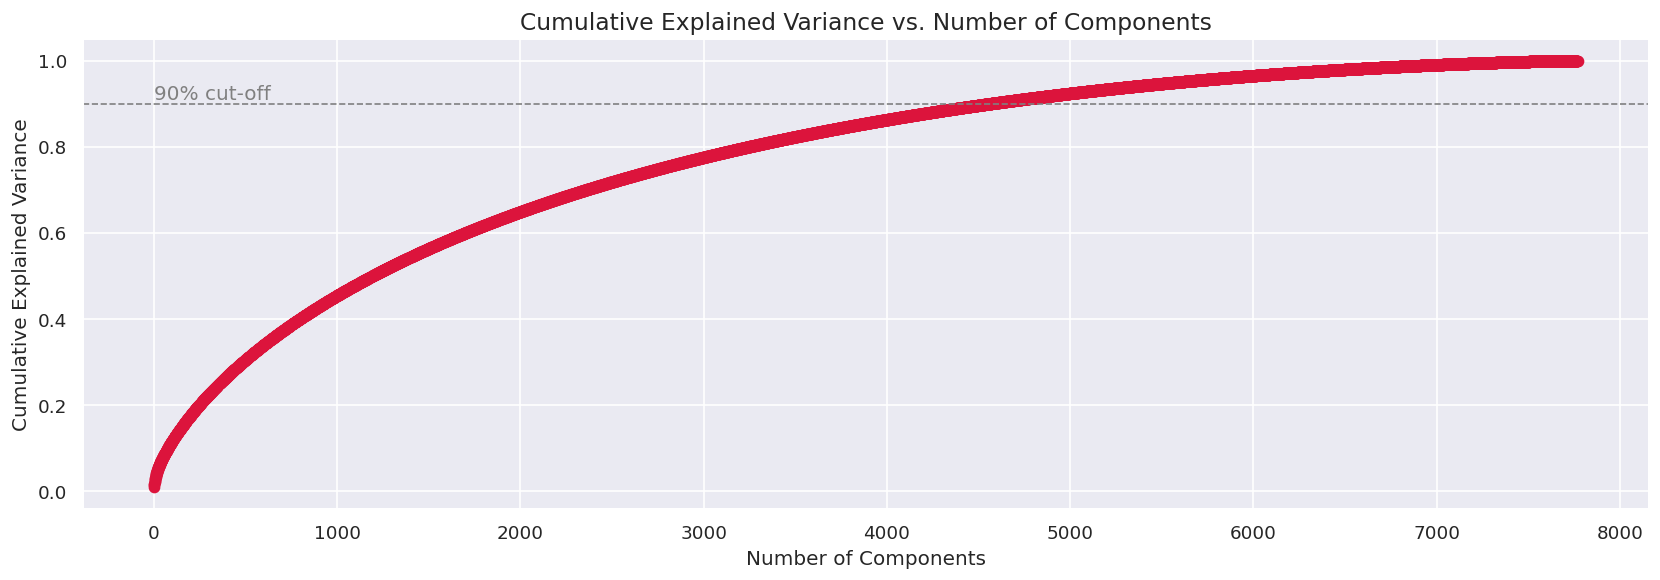

In [366]:

# Plot cumulative explained variance
plt.figure(figsize=(14, 5), dpi=120)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='crimson')

# Add horizontal line at 90% variance
plt.axhline(y=0.90, color='gray', linestyle='dashed', linewidth=1)
plt.text(1, 0.91, '90% cut-off', color='gray')

# Labels and grid
plt.title('Cumulative Explained Variance vs. Number of Components', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [367]:

pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7770, 5592)

In [368]:
X_transformed

array([[ 1.24422243e-01, -1.67822944e-02, -2.12411644e-02, ...,
         5.31539337e-03,  1.99072759e-03, -1.49241624e-02],
       [-4.04051522e-02, -3.47326691e-02, -4.44193845e-03, ...,
        -1.89533072e-03, -3.14089699e-04, -5.05005033e-03],
       [-4.41749813e-02, -4.13279542e-02, -3.82932867e-02, ...,
         4.56312990e-03, -4.19015577e-03, -1.59430714e-03],
       ...,
       [-8.06165858e-02,  7.48397622e-02,  2.75077757e-01, ...,
        -4.24106141e-03,  2.17274886e-04,  4.69902889e-04],
       [ 1.02576562e-01,  4.16470013e-03,  1.63529637e-02, ...,
        -1.41682712e-03, -1.04600374e-02, -4.99684703e-03],
       [-9.22015327e-02,  1.98103962e-01,  3.53989984e-01, ...,
        -8.88498198e-03,  5.78860976e-03,  2.14437768e-03]])

##Get optimum K value using Metric:Shilhouette.

In [369]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go

# Range of clusters
k_values = list(range(4, 23))
silhouette_scores = []

# Compute silhouette scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=5, n_init='auto')
    labels = kmeans.fit_predict(X_transformed)
    score = silhouette_score(X_transformed, labels)
    silhouette_scores.append(score)

# Plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=k_values,
    y=silhouette_scores,
    mode='lines+markers',
    marker=dict(color='crimson', size=8),
    line=dict(dash='dash'),
    name='Silhouette Score'
))

# Add best k annotation
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
fig.add_vline(x=best_k, line_dash='dot', line_color='green')
fig.add_annotation(x=best_k, y=max(silhouette_scores),
                   text=f"Best k = {best_k}",
                   showarrow=True, arrowhead=2)

# Layout
fig.update_layout(
    title="Silhouette Score vs Number of Clusters (k)",
    xaxis_title="Number of Clusters (k)",
    yaxis_title="Silhouette Score",
    template='plotly_white',
    height=500,
    width=800
)

fig.show()


In [370]:
from yellowbrick.cluster import SilhouetteVisualizer

In [371]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import plotly.graph_objects as go

def silhouette_score_analysis_interactive(n):
    silhouette_scores = []
    k_values = list(range(2, n+1))  # Range of clusters

    # Loop to calculate silhouette score for each n_clusters
    for n_clusters in k_values:
        km = KMeans(n_clusters=n_clusters, random_state=5, n_init='auto')
        preds = km.fit_predict(X_transformed)

        score = silhouette_score(X_transformed, preds, metric='euclidean')
        silhouette_scores.append(score)

        # You can remove the silhouette visualizer if it's not interactive
        # However, Plotly can be used to interactively show the scores

    # Plot interactive silhouette scores using Plotly
    fig = go.Figure()

    # Add silhouette scores as a line plot
    fig.add_trace(go.Scatter(
        x=k_values,
        y=silhouette_scores,
        mode='lines+markers',
        marker=dict(color='crimson', size=8),
        name='Silhouette Score'
    ))

    # Add annotations for optimal k (max silhouette score)
    best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
    fig.add_vline(x=best_k, line_dash='dot', line_color='green')
    fig.add_annotation(
        x=best_k, y=max(silhouette_scores),
        text=f"Best k = {best_k}",
        showarrow=True, arrowhead=2
    )

    # Update plot layout
    fig.update_layout(
        title="Silhouette Score vs Number of Clusters (k)",
        xaxis_title="Number of Clusters (k)",
        yaxis_title="Silhouette Score",
        template='plotly_white',
        height=500,
        width=800
    )

    # Show the interactive plot
    fig.show()

# Call the function with a range for n_clusters (e.g., up to 20)
silhouette_score_analysis_interactive(20)


In [372]:
silhouette_score_analysis_interactive(22)

In [373]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.004868749870600581


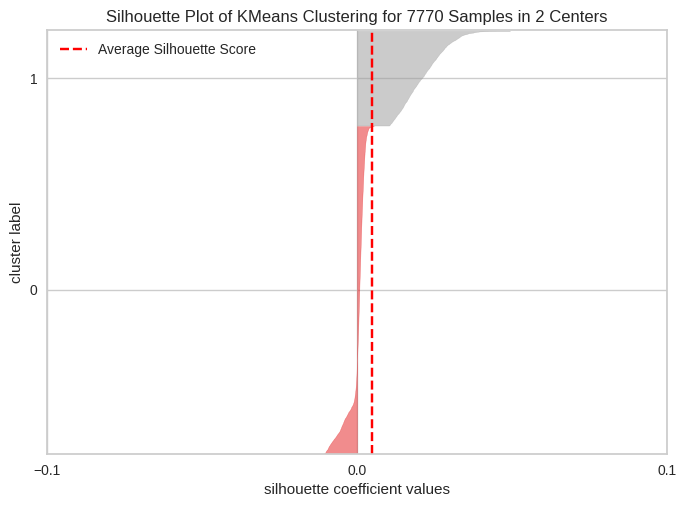

For n_clusters = 3, silhouette score is 0.006047146933937564


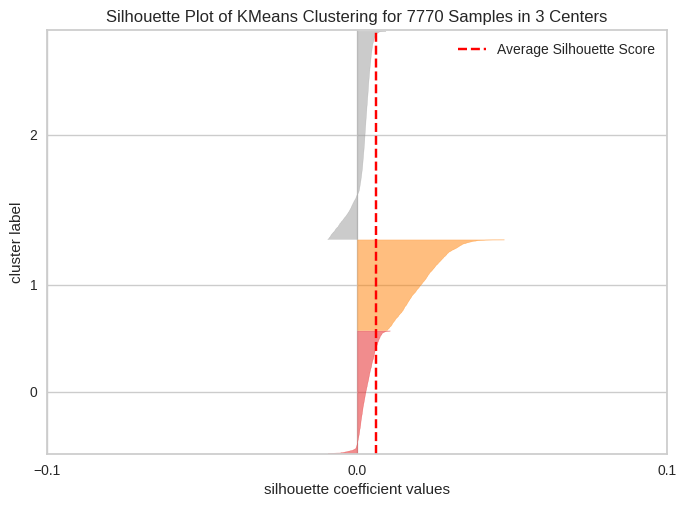

For n_clusters = 4, silhouette score is 0.006707631927243652


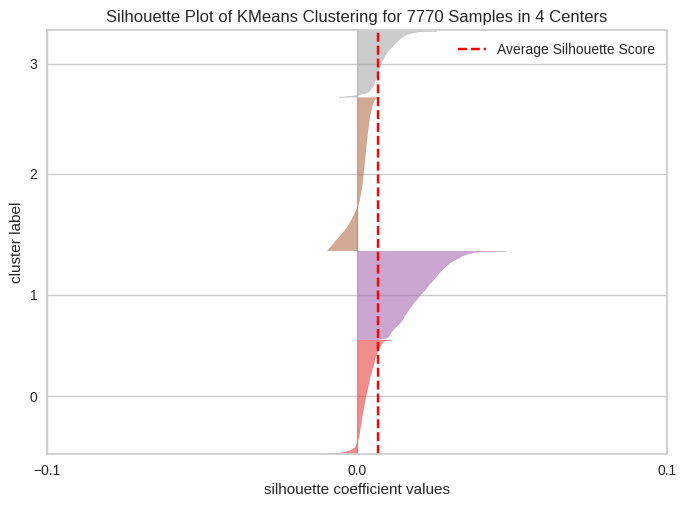

For n_clusters = 5, silhouette score is 0.007073821023670973


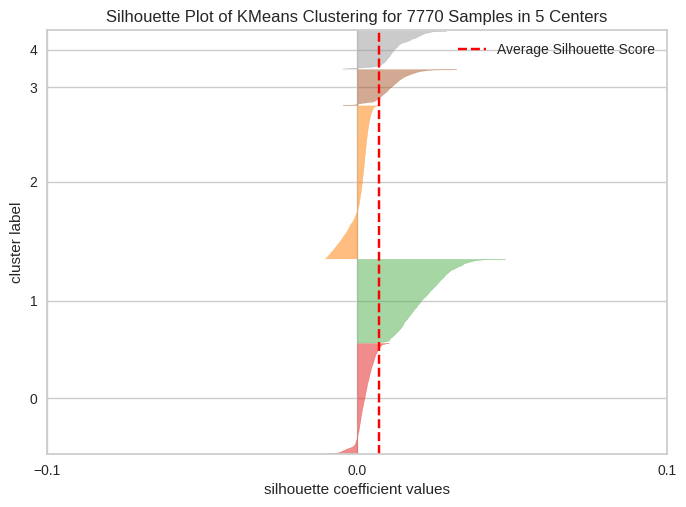

For n_clusters = 6, silhouette score is 0.0062169300001218425


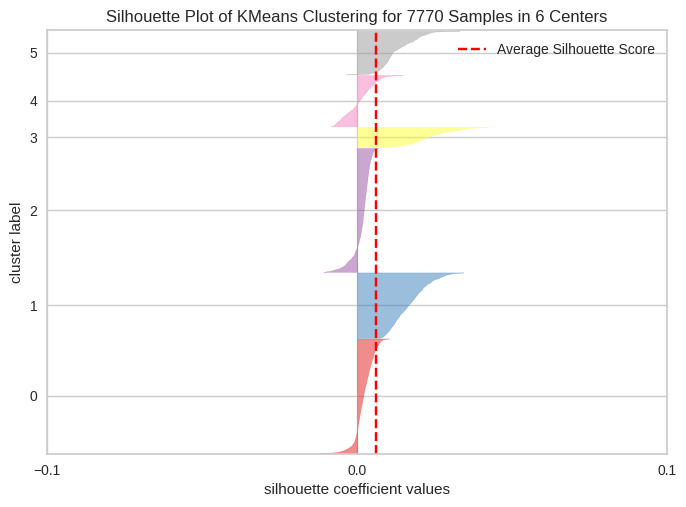

For n_clusters = 7, silhouette score is 0.006347900821853624


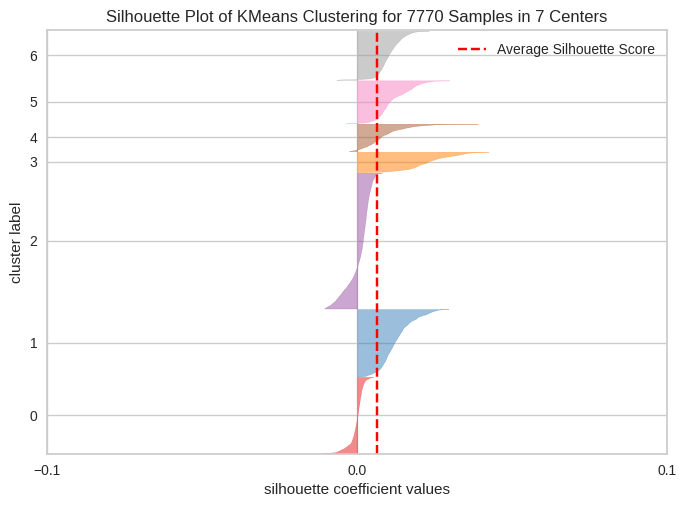

For n_clusters = 8, silhouette score is 0.005087777423866564


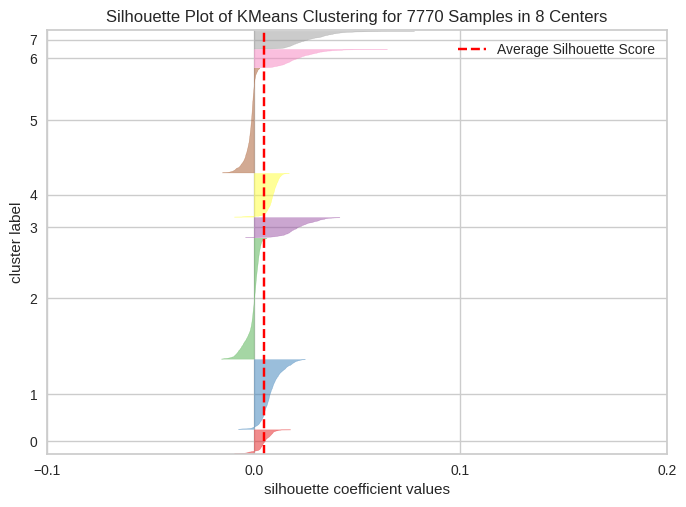

For n_clusters = 9, silhouette score is 0.004630828235071105


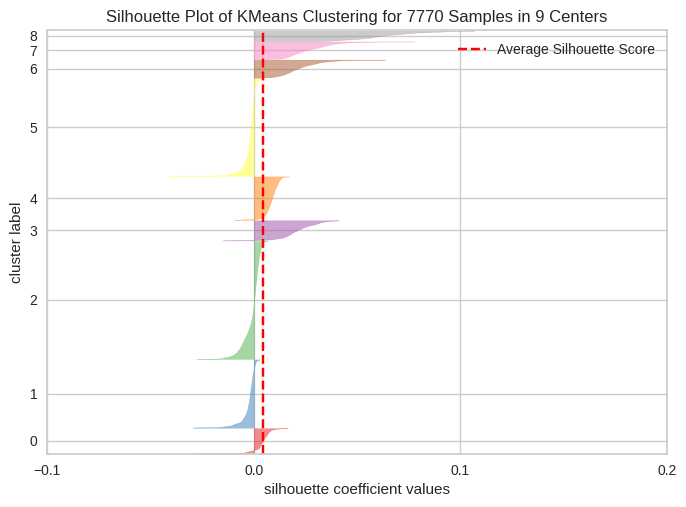

For n_clusters = 10, silhouette score is 0.005137041491401974


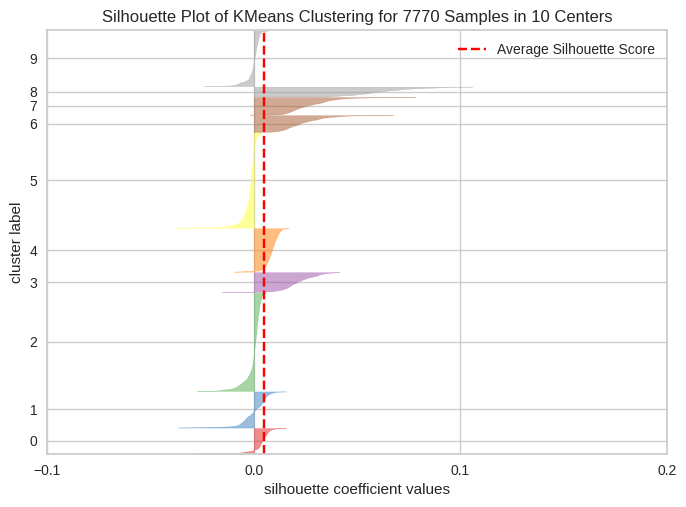

For n_clusters = 11, silhouette score is 0.004857868430258748


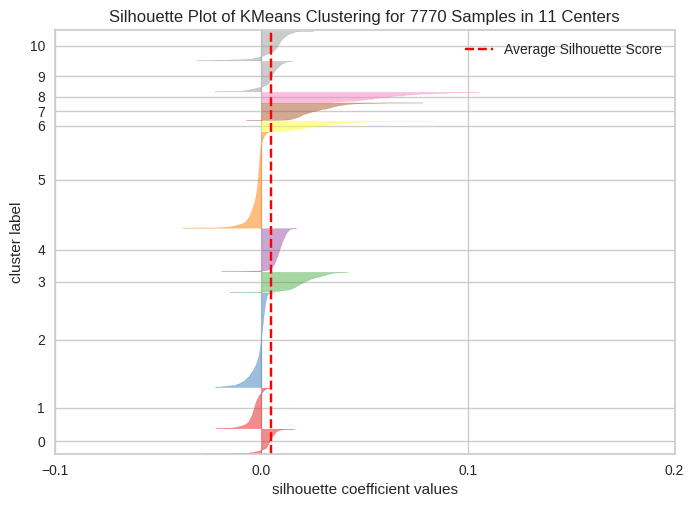

For n_clusters = 12, silhouette score is 0.005170658449390839


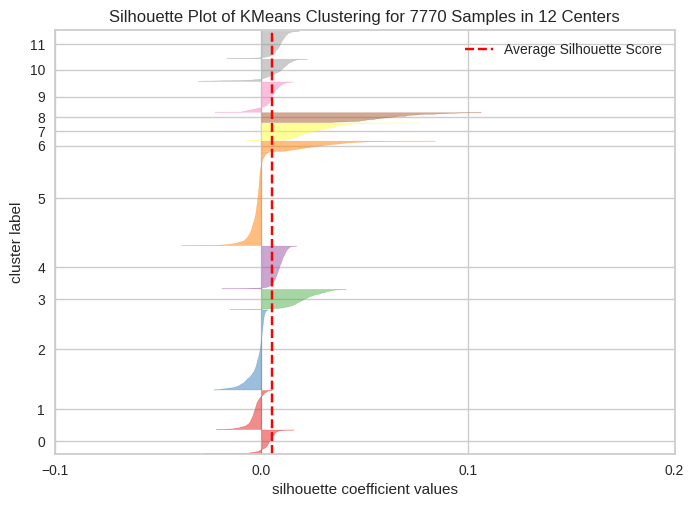

For n_clusters = 13, silhouette score is 0.005991618585333107


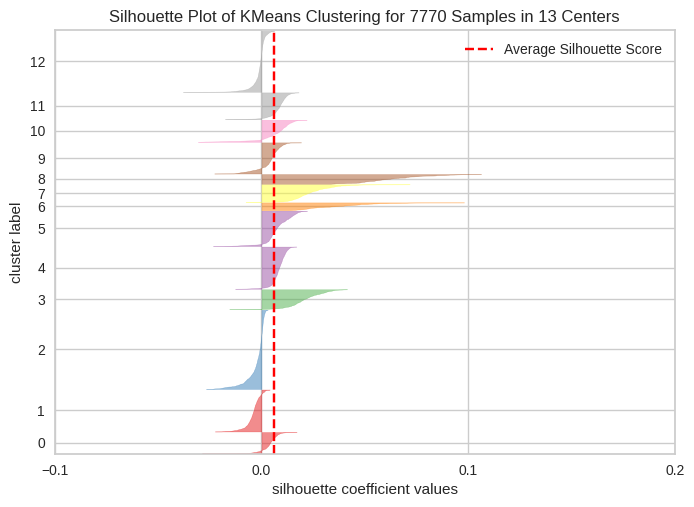

For n_clusters = 14, silhouette score is 0.005320452078304371


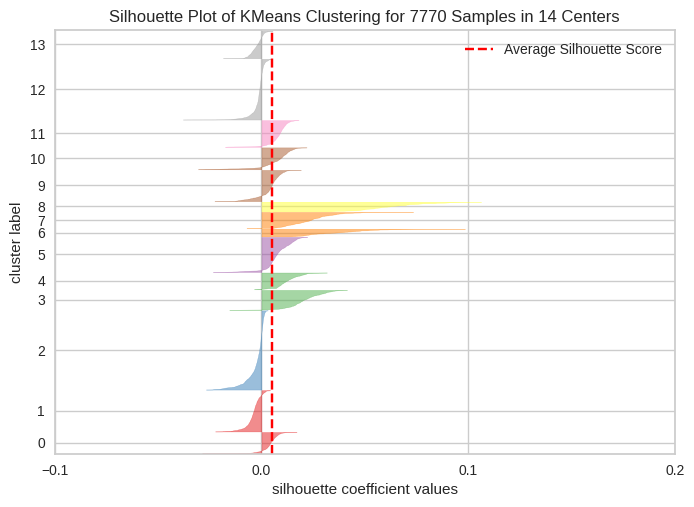

For n_clusters = 15, silhouette score is 0.005426921750251703


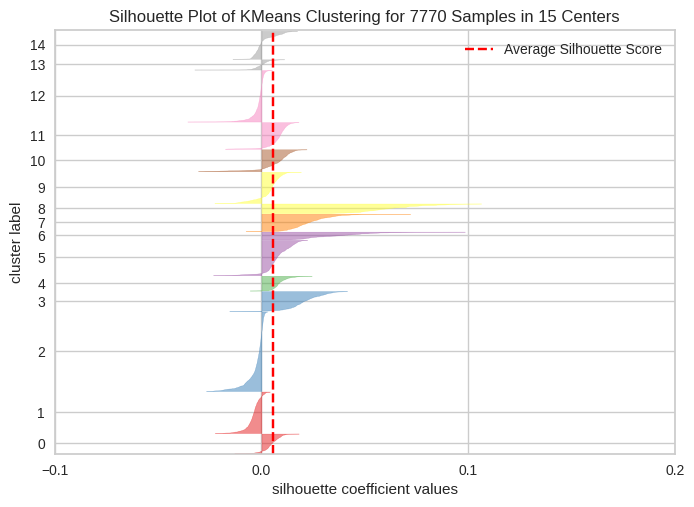

For n_clusters = 16, silhouette score is 0.006055913486124164


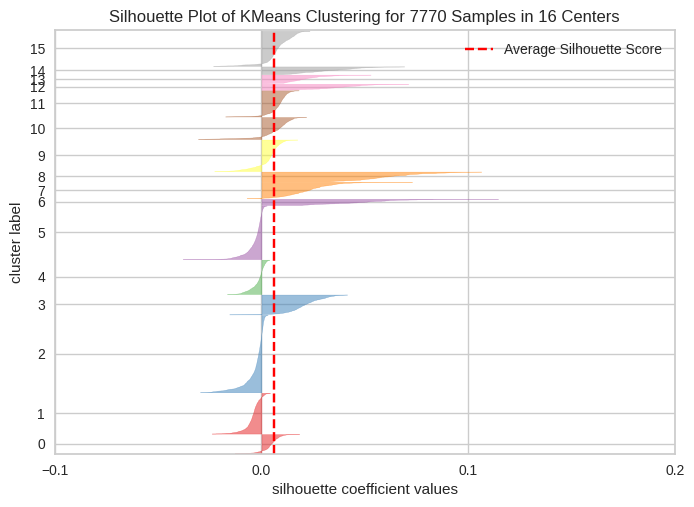

For n_clusters = 17, silhouette score is 0.006133872002253749


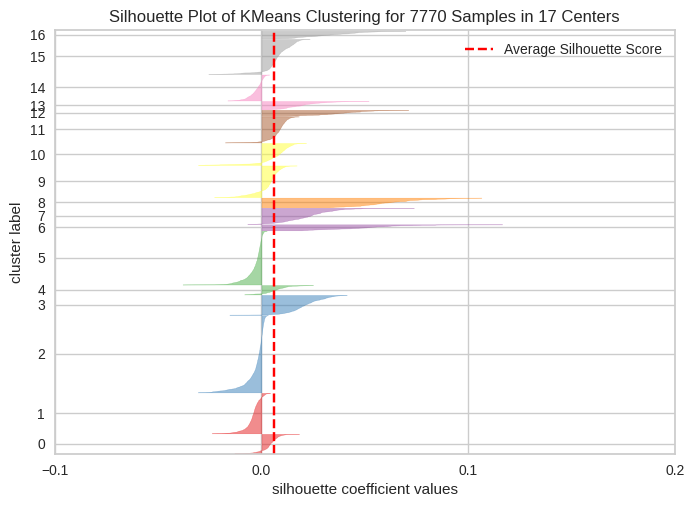

For n_clusters = 18, silhouette score is 0.006142521005462397


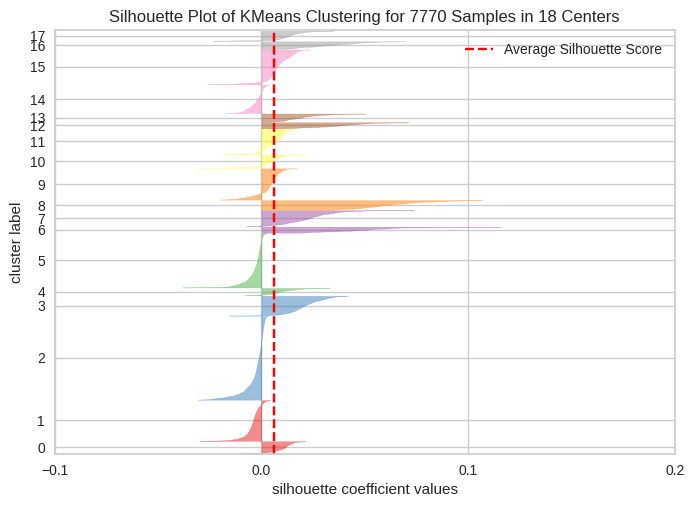

For n_clusters = 19, silhouette score is 0.0065840661733822005


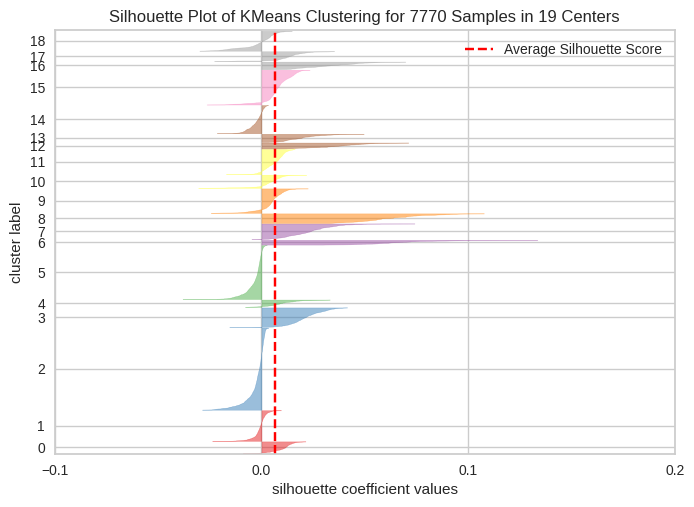

For n_clusters = 20, silhouette score is 0.006420681388201981


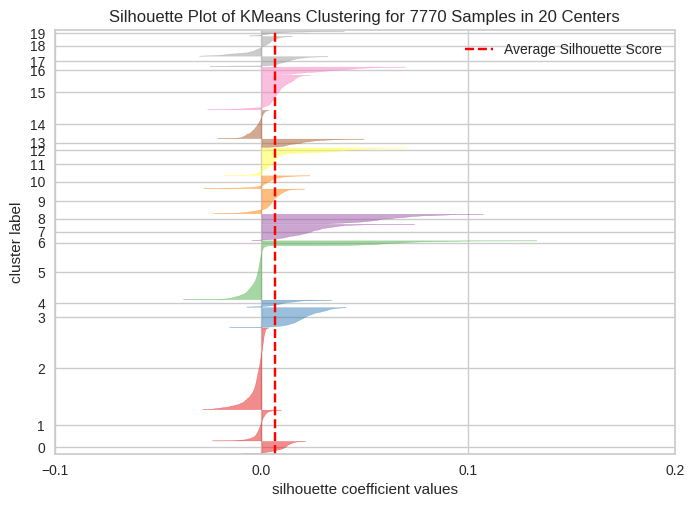

For n_clusters = 21, silhouette score is 0.007370880228118455


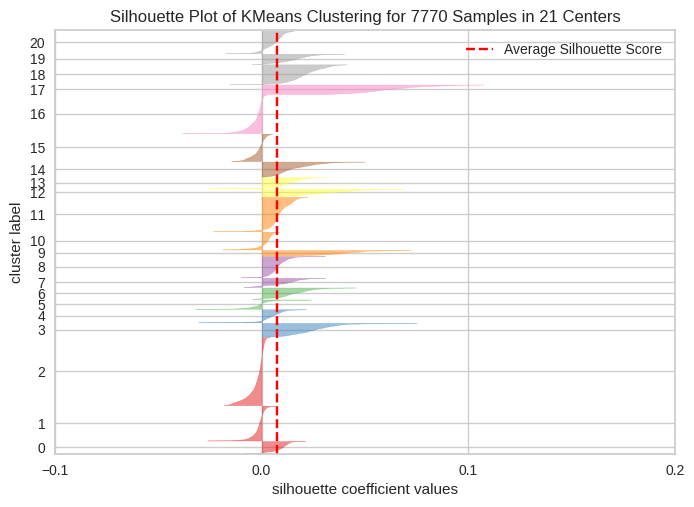

In [374]:
silhouette_score_analysis(22)

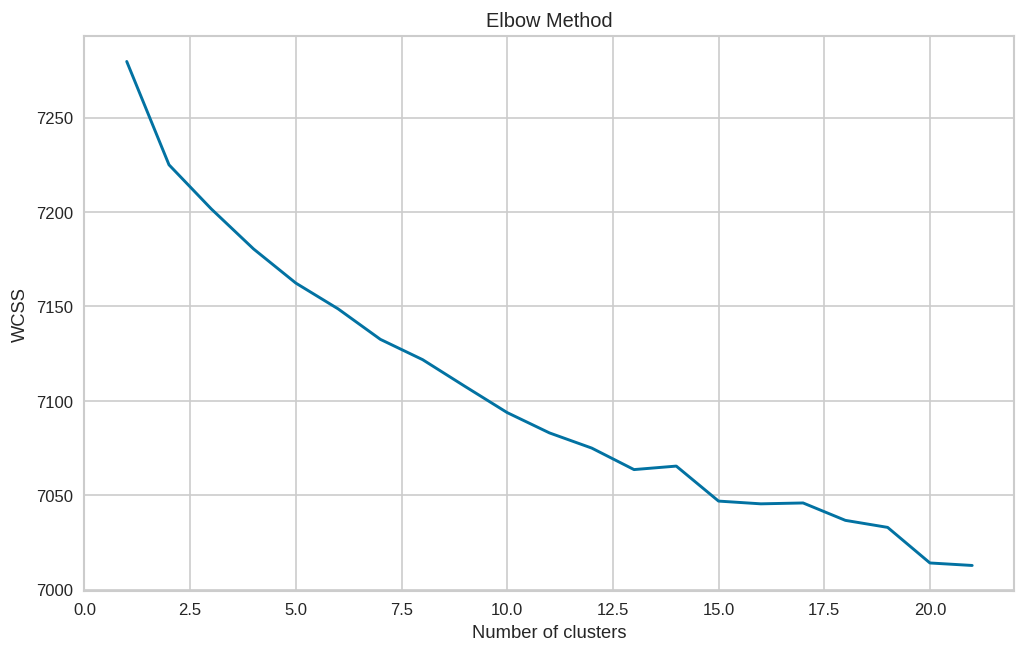

In [376]:
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [378]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=9)
label = kmeans.fit_predict(X_transformed)

# Create the Plotly figure
fig = go.Figure()

# Add scatter traces for each unique label
unique_labels = np.unique(label)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i, color in zip(unique_labels, colors):
    fig.add_trace(go.Scatter(
        x=X_transformed[label == i, 0],
        y=X_transformed[label == i, 1],
        mode='markers',
        name=f'Cluster {i}',
        marker=dict(color=color, size=8),
        showlegend=True
    ))

# Layout and style settings
fig.update_layout(
    title='KMeans Clustering (10 clusters)',
    xaxis_title='Feature 1',
    yaxis_title='Feature 2',
    template='plotly_dark',
    height=600,
    width=800,
    showlegend=True
)

# Show the interactive plot
fig.show()


In [380]:
# Add cluster values to the dateframe.
df['cluster_number'] = kmeans.labels_

In [381]:

#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [383]:

#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = df[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

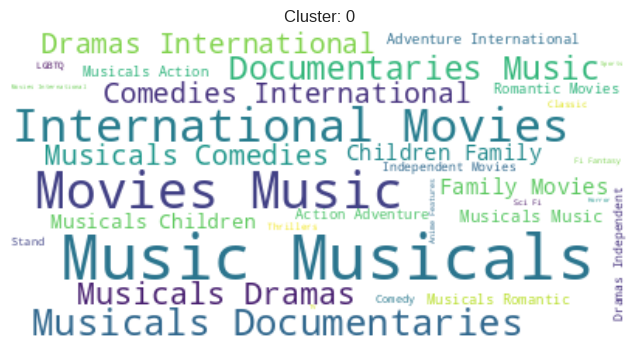

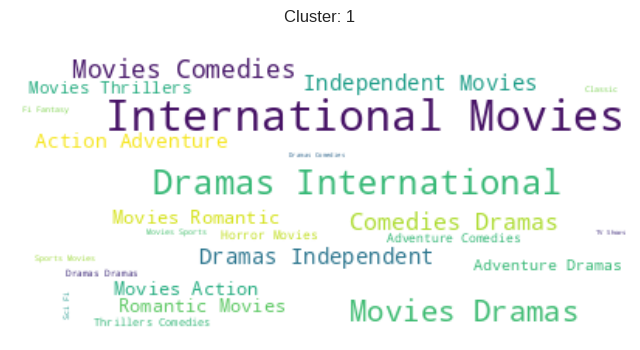

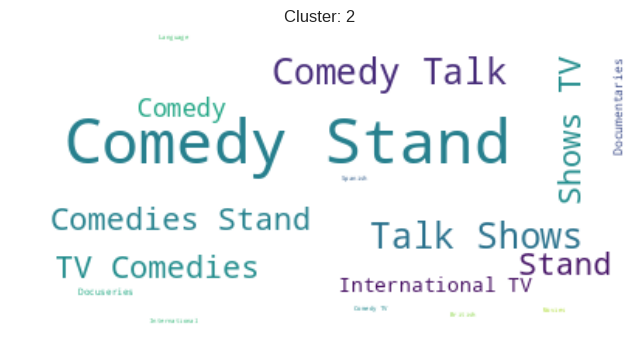

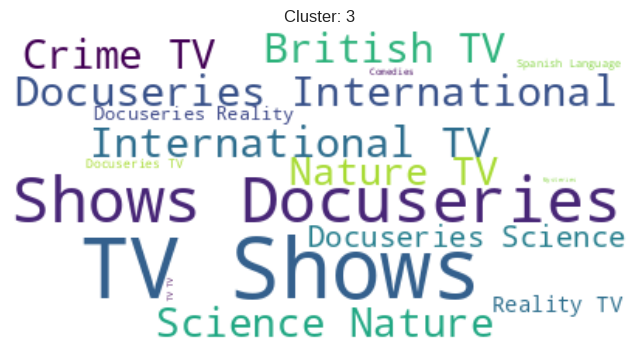

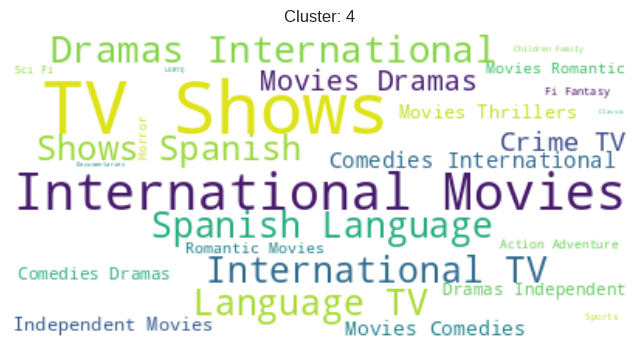

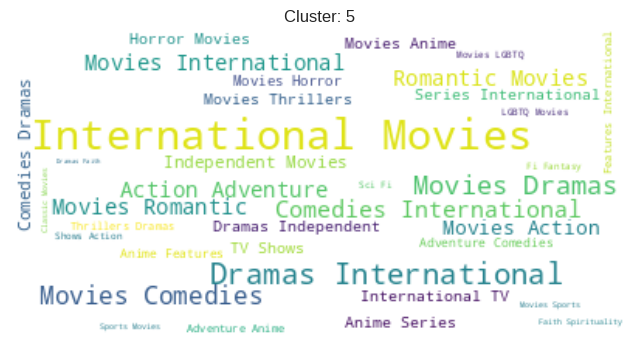

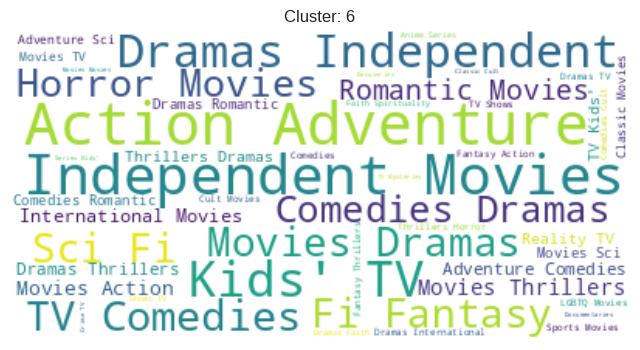

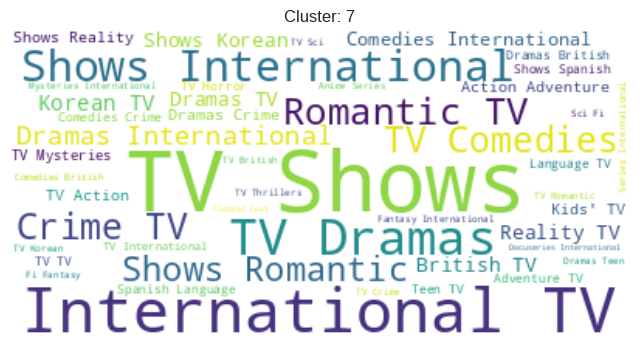

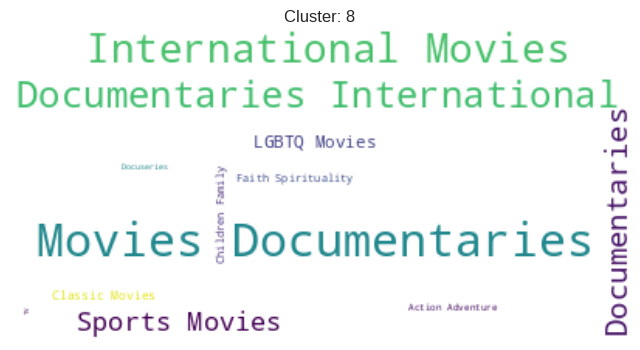

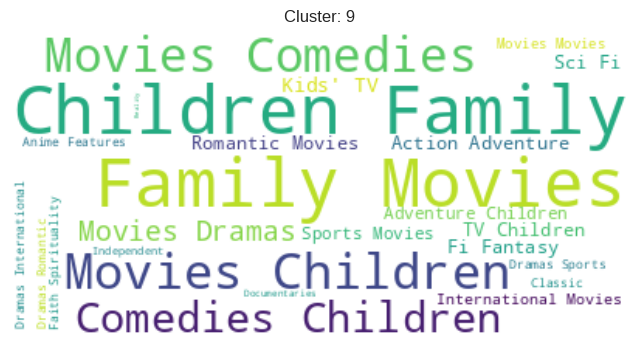

In [384]:
for i in range(10):
  func_select_Category(i,'listed_in')

In [385]:

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [386]:
t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bag_of_words)

In [387]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.03492406, 0.02002926, ..., 0.00535418, 0.02271873,
        0.00321763],
       [0.03492406, 1.        , 0.00561037, ..., 0.0536173 , 0.00214453,
        0.00376726],
       [0.02002926, 0.00561037, 1.        , ..., 0.00758224, 0.00210856,
        0.        ],
       ...,
       [0.00535418, 0.0536173 , 0.00758224, ..., 1.        , 0.00289826,
        0.20715934],
       [0.02271873, 0.00214453, 0.00210856, ..., 0.00289826, 1.        ,
        0.02487833],
       [0.00321763, 0.00376726, 0.        , ..., 0.20715934, 0.02487833,
        1.        ]])

In [388]:
indices = pd.Series(cluster_df.index)
indices[:5]

0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

In [389]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00


In [390]:
import gradio as gr
import pandas as pd

# Assuming you have all the data required already loaded, like `cluster_df`, `cosine_sim`, and `indices`.

# Function to get recommendations for movies or TV shows
def recommendations(Title, cosine_sim = cosine_sim):
    recommended_movies = []

    # get the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)

    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_df.index)[i])

    return recommended_movies

# Gradio function
def recommend_movie_tvshow(title):
    # Get recommendations for movies or tv shows
    recommendations_list = recommendations(title)
    return recommendations_list

# Create a Gradio interface
iface = gr.Interface(
    fn=recommend_movie_tvshow,
    inputs=gr.Textbox(label="Enter Movie/TV Show Title"),
    outputs=gr.Dataframe(headers=["Recommendations"]),
    title="Movie & TV Show Recommender",
    description="Enter a movie or TV show title to get 10 recommended movies or TV shows based on similarity.",
    theme="compact"
)

# Launch the interface
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0e28d266e6173d28ef.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
